In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

In [2]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
data = torch.load('../evaluation/focal_length_classifier_eval_results.pt')

/tmp/ipykernel_992845/2722826900.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('../evaluation/focal_length_classifier_eval_results.pt')


In [4]:
focal_lengths = np.asarray(data['focal_length_sweep'])
train_f1_scores = np.asarray(data['train_f1_scores'])
valid_f1_scores = np.asarray(data['valid_f1_scores'])
sorted_indices = np.argsort(focal_lengths)  # Get indices to sort array1
print(sorted_indices)
focal_lengths = focal_lengths[sorted_indices]
train_f1_scores = train_f1_scores[sorted_indices]
valid_f1_scores = valid_f1_scores[sorted_indices]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [5]:
train_f1_scores

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0.])

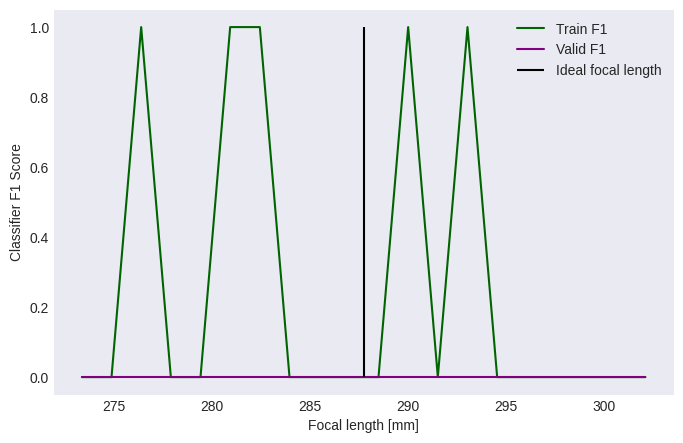

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(focal_lengths, train_f1_scores, color='darkgreen', label='Train F1')
ax.plot(focal_lengths, valid_f1_scores, color='purple', label='Valid F1')
ax.vlines(x=287.75, ymin=0, ymax=1, color='black', label='Ideal focal length')
ax.set_xlabel("Focal length [mm]")
ax.set_ylabel("Classifier F1 Score")
ax.legend()

In [7]:
valid_images = np.asarray([i.detach().cpu().squeeze().numpy() for i in data['valid_images']])
valid_images = valid_images[sorted_indices]

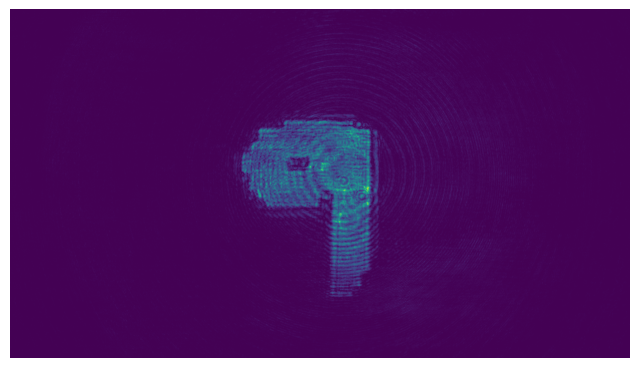

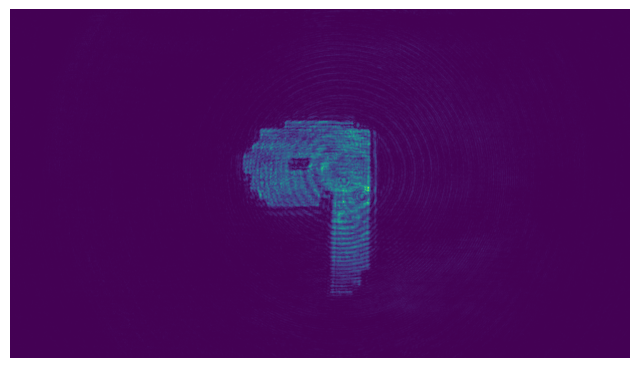

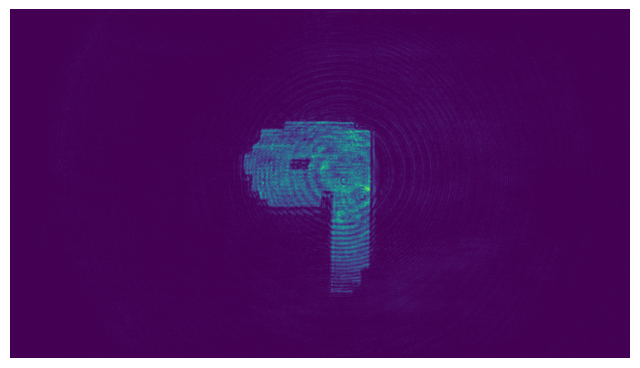

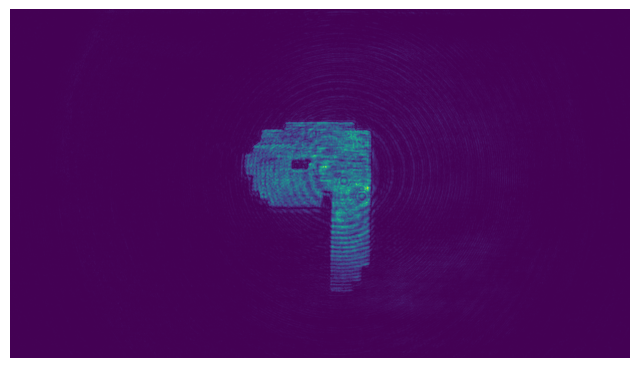

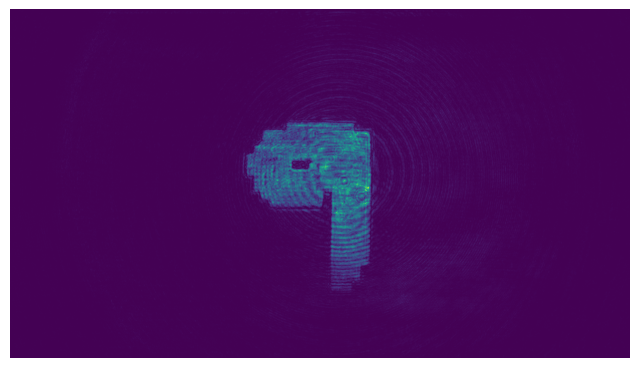

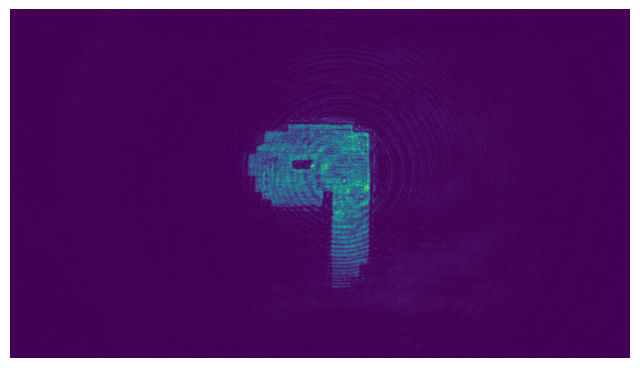

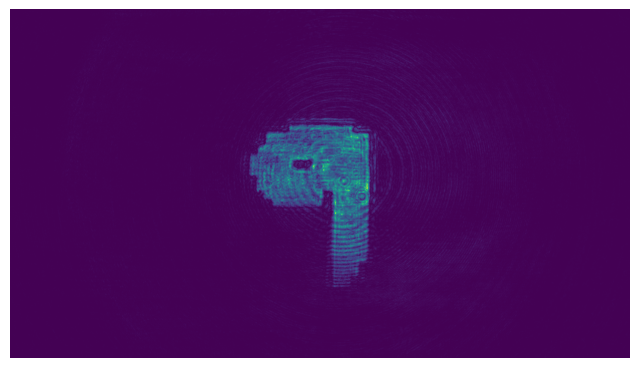

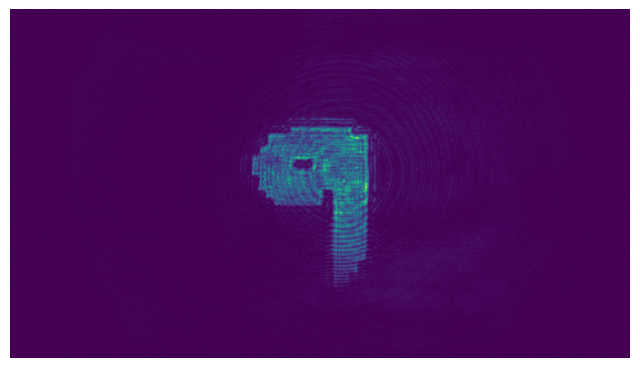

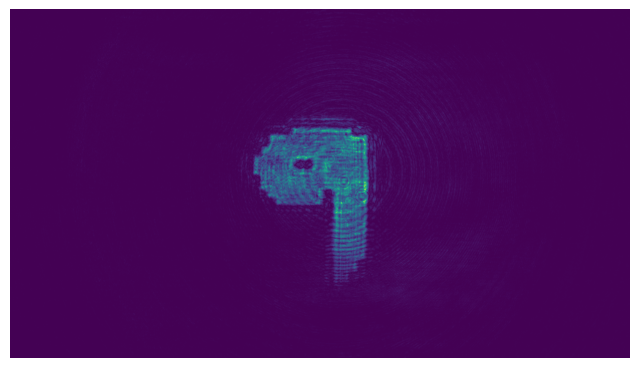

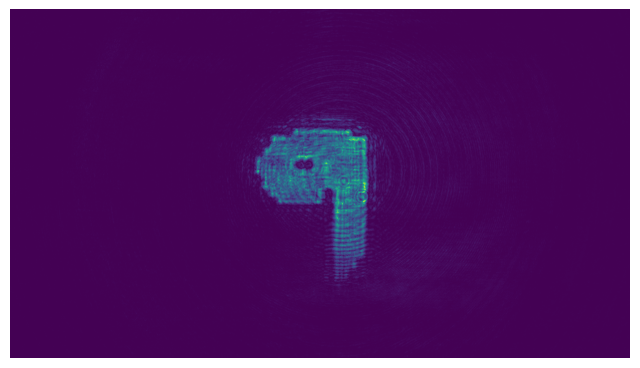

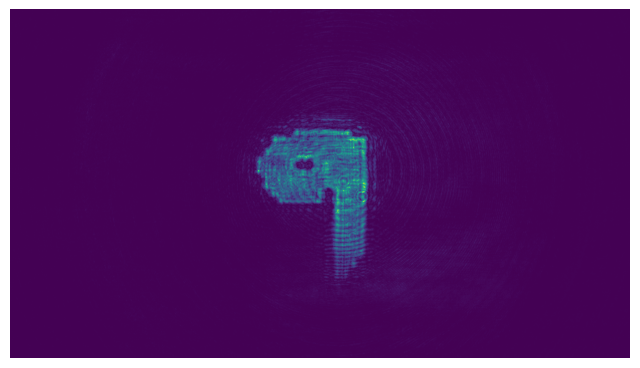

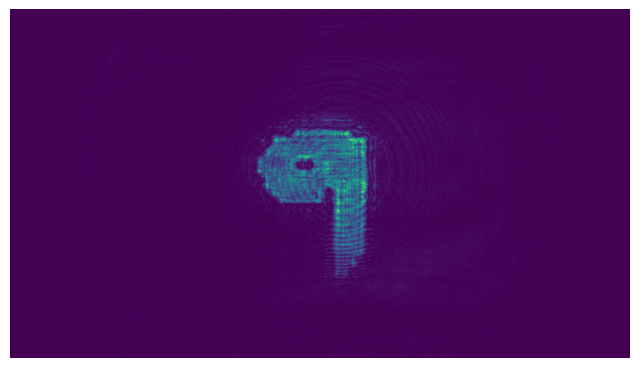

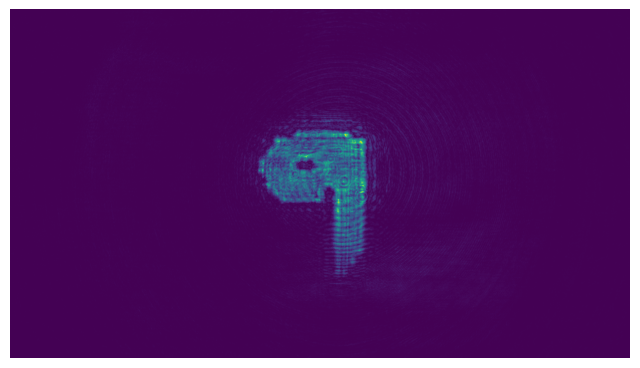

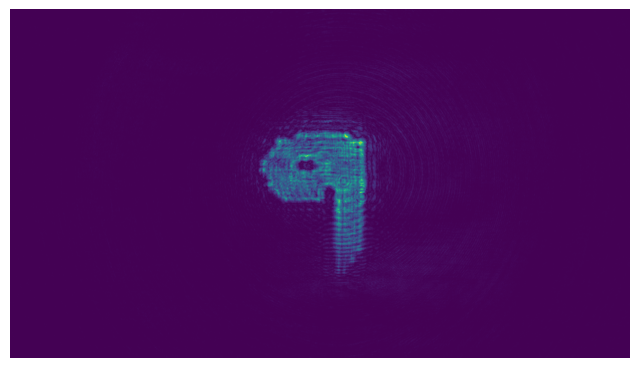

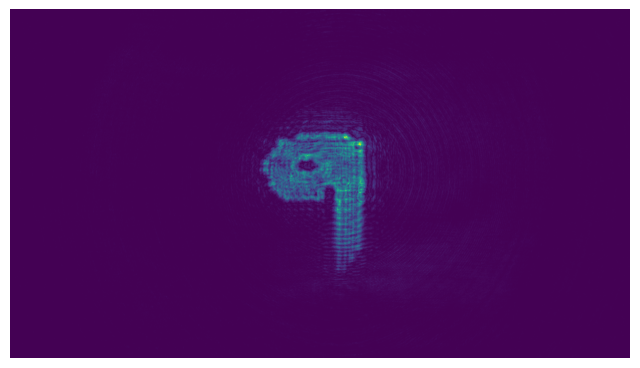

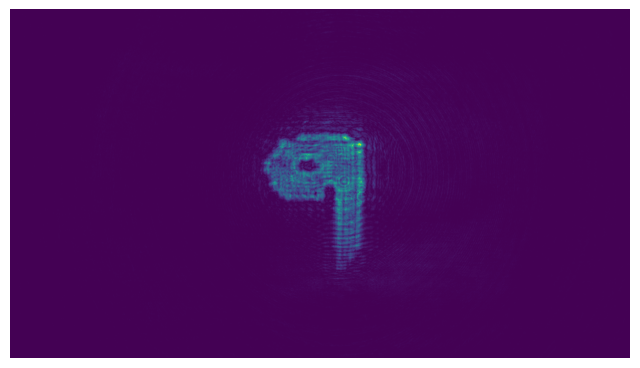

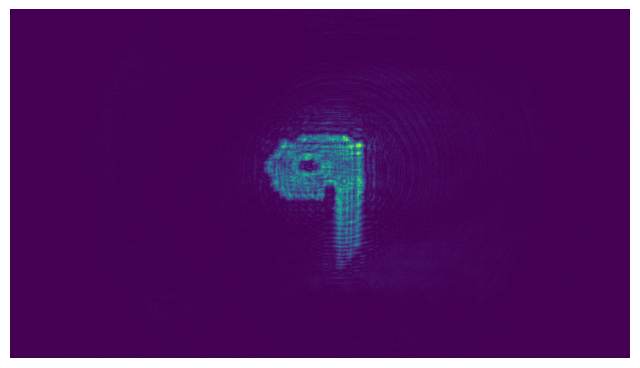

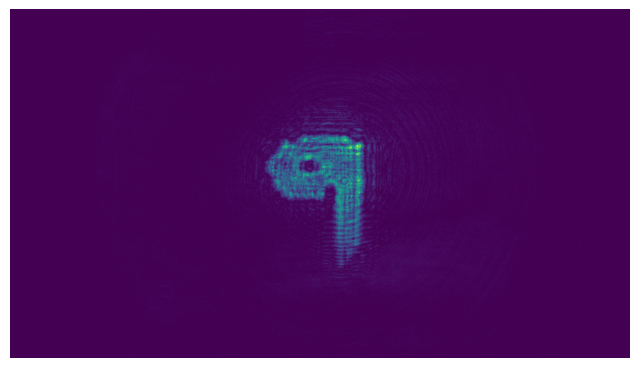

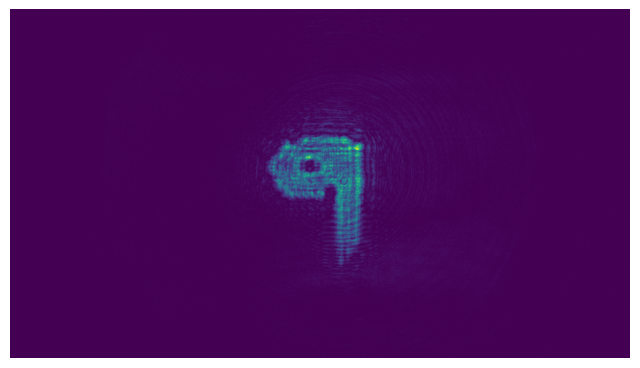

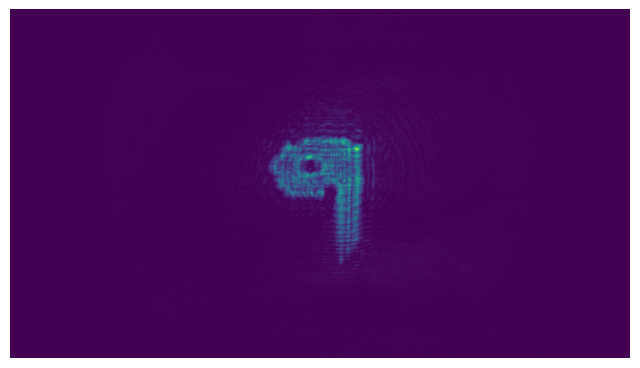

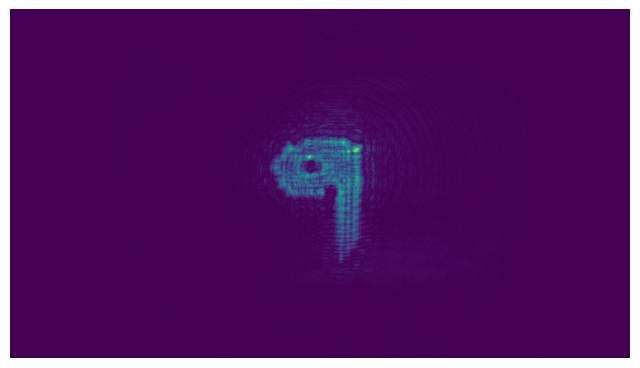

In [8]:
# Animation loop
for image in valid_images:
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.imshow(image, cmap='viridis')
    ax.axis('off')
    display(fig)
    clear_output(wait=True)
    time.sleep(1)